In [242]:
#!pip install tradingeconomics
#!pip install config

In [243]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [244]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
config.read('config.ini')


['config.ini']

In [245]:
#import API data from CSO with :
#reference: https://data.cso.ie/
# data also available in Data/BAA14.20230507T230558.csv
# BAA14
import requests
import pandas as pd
import io

#surpress warnings
pd.options.mode.chained_assignment = None  # default='warn'

url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA14%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)
data = response.json().get('result')
#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

print(df.head(5))   
print(df.info())
print(df.tail(5))







            Statistic Label  Year  \
0  Construction Enterprises  2019   
1  Construction Enterprises  2019   
2  Construction Enterprises  2019   
3  Construction Enterprises  2019   
4  Construction Enterprises  2019   

                                 Nace Rev 2 Activity    UNIT    VALUE  
0             Development of building projects (411)  Number   3846.0  
1  Construction of residential and non-residentia...  Number  12227.0  
2           Construction of roads and railways (421)  Number    777.0  
3             Construction of utility projects (422)  Number    304.0  
4  Construction of other civil engineering projec...  Number    540.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      880 non-null    object 
 1   Year                 880 non-null    int64  
 2   Nace Rev 2 Activity  880 non-null   

In [246]:
#print unique values in each column
print(df['Statistic Label'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

In [247]:
print(df['Nace Rev 2 Activity'].unique())

['Development of building projects (411)'
 'Construction of residential and non-residential buildings (412)'
 'Construction of roads and railways (421)'
 'Construction of utility projects (422)'
 'Construction of other civil engineering projects (429)'
 'Demolition and site preparation (431)'
 'Electrical, plumbing and other construction installation activities (432)'
 'Building completion and finishing (433)'
 'Other specialised construction activities (439)'
 'Construction (41 to 43)']


In [248]:
#drop all rows where 'Nace Rev 2 Activity' not equal to 'Building completion and finishing (433)'
df = df[df['Nace Rev 2 Activity'] == 'Building completion and finishing (433)']

In [249]:
#drop column 'Construction of residential and non-residential buildings (412)'
df = df.drop(columns=['Nace Rev 2 Activity'])


In [250]:
print(df.columns.to_list())

['Statistic Label', 'Year', 'UNIT', 'VALUE']


In [251]:
#check for null values
print(df.isnull().sum())

Statistic Label     0
Year                0
UNIT                0
VALUE              62
dtype: int64


In [252]:
#drop rowns with null values
df = df.dropna()

In [253]:
df.to_csv('Data/BAA14.csv', index=False)

In [254]:
#print list of VALUE where Year = 2019
print(df.loc[df['Year'] == 2019, 'VALUE'].to_list())


[20096.0, 18308.0, 35597.0, 495965.0, 47975.0, 543939.0, 3078074.0, 10364.0, 2787627.0, 3039214.0, 1926951.0, 1112264.0, 1107713.0]


In [255]:
#normalize data in VALUE column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df.head(5))

              Statistic Label  Year    UNIT     VALUE
7    Construction Enterprises  2019  Number  0.004686
17   Construction Enterprises  2020  Number  0.005014
67          Employees - Total  2019  Number  0.004104
77          Employees - Total  2020  Number  0.003709
127   Persons Engaged - Total  2019  Number  0.009732


[0.004686275377753244, 0.004104315357234921, 0.009731556293891112, 0.15957259137553476, 0.01376036006009681, 0.17518721666879314, 1.0, 0.0015186943264756656, 0.9054650212083417, 0.9873518085026052, 0.6253313396537403, 0.3601662036157033, 0.3586849396037464]
[0.005013709259543754, 0.003708855947318948, 0.009612430249422597, 0.13617864480128733, 0.010527357328660294, 0.14828621236463244, 0.8848825794759495, 0.0, 0.7792096410074808, 0.8758794496506938, 0.5642232591323457, 0.30980159980419064, 0.305799159998646]
['Construction Enterprises', 'Employees - Total', 'Persons Engaged - Total', 'Wages and Salaries - Total', 'Labour Costs - Other', 'Labour Costs - Total', 'Turnover - Total', 'Purchases - Factored goods', 'Purchases - Total', 'Production value', 'Intermediate consumption', 'Gross value added at basic prices', 'Gross value added at factor cost']


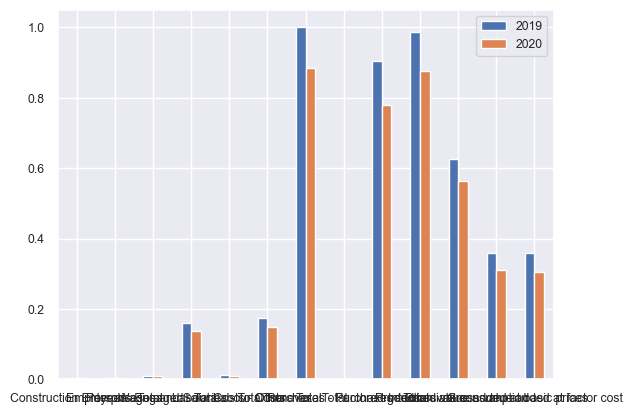

In [256]:
#plot a bar plot for each 'Statistic Label' 'VALUE' comparing 2019 and 2020
#reference: https://stackoverflow.com/questions/33458566/how-to-plot-a-bar-chart-using-matplotlib-using-a-dictionary
# list of values for each label for 2019 where UNIT = Number

nineteen = df.loc[df['Year'] == 2019, 'VALUE'].to_list()
twenty = df.loc[df['Year'] == 2020, 'VALUE'].to_list()
index_ = df.loc[df['Year'] == 2019, 'Statistic Label'].to_list()
# list of values for each label for 2020
print(nineteen)
print(twenty)
print(index_)
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'2019': nineteen, '2020': twenty}, index=index_)
ax = df.plot.bar(rot=0)
plt.show()

In [257]:
#BAA15 - Persons Engaged 


url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA15%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)

data = response.json().get('result')

#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
personsEngaged_df = pd.read_csv(io.StringIO(data))
print(personsEngaged_df.head(5))
print(personsEngaged_df.info()) 

print(personsEngaged_df.tail(5))


            Statistic Label  Year Persons Engaged    UNIT    VALUE
0  Construction Enterprises  2019           0 - 9  Number  56935.0
1  Construction Enterprises  2019         10 - 49  Number   2007.0
2  Construction Enterprises  2019        50 - 249  Number    208.0
3  Construction Enterprises  2019    250 and over  Number     25.0
4  Construction Enterprises  2020           0 - 9  Number  60553.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  352 non-null    object 
 1   Year             352 non-null    int64  
 2   Persons Engaged  352 non-null    object 
 3   UNIT             352 non-null    object 
 4   VALUE            104 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB
None
                      Statistic Label  Year Persons Engaged           UNIT  \
347  Gross value added at 

2

    2.1

In [258]:
# reference https://ec.europa.eu/eurostat/databrowser/view/EI_ISBU_Q__custom_6200052/settings_1/table?lang=en
df = pd.read_csv('Data/ei_isbu_q__custom_6200052_linear.csv', header=0,  parse_dates=True)

In [259]:
df.head(5)

DATAFLOW        LAST UPDATE freq   unit s_adj   indic nace_r2  \
0  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
1  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
2  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
3  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
4  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   

  geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  AL     2010-Q1       90.4      NaN  
1  AL     2010-Q2       88.9      NaN  
2  AL     2010-Q3       87.0      NaN  
3  AL     2010-Q4       79.2      NaN  
4  AL     2011-Q1       81.2      NaN

    2.2

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     7252 non-null   object 
 1   LAST UPDATE  7252 non-null   object 
 2   freq         7252 non-null   object 
 3   unit         7252 non-null   object 
 4   s_adj        7252 non-null   object 
 5   indic        7252 non-null   object 
 6   nace_r2      7252 non-null   object 
 7   geo          7252 non-null   object 
 8   TIME_PERIOD  7252 non-null   object 
 9   OBS_VALUE    7248 non-null   float64
 10  OBS_FLAG     634 non-null    object 
dtypes: float64(1), object(10)
memory usage: 623.3+ KB


In [261]:
#show rows where 'OBS_VALUE' is null
print(df[df['OBS_VALUE'].isnull()])

                  DATAFLOW        LAST UPDATE freq   unit s_adj   indic  \
156   ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
1356  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
3120  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-HWI   
6737  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-WSI   

     nace_r2 geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
156        F  BE     2022-Q4        NaN        c  
1356       F  NL     2022-Q4        NaN        c  
3120       F  NL     2022-Q4        NaN        c  
6737       F  NL     2022-Q4        NaN        c  


In [262]:
#remove rows where 'OBS_VALUE' is null
df = df[df['OBS_VALUE'].notna()]

In [263]:
#drop rows where TIME_PERIOD contains '2023'
df = df[~df['TIME_PERIOD'].str.contains('2023')]

    2.3

In [264]:
#loop through columns and print unique values
for col in df.columns:
    print(col, ": ", df[col].unique())
    


DATAFLOW :  ['ESTAT:EI_ISBU_Q(1.0)']
LAST UPDATE :  ['13/05/23 11:00:00']
freq :  ['Q']
unit :  ['I2015']
s_adj :  ['NSA']
indic :  ['IS-EPI' 'IS-HWI' 'IS-IP' 'IS-WSI']
nace_r2 :  ['F']
geo :  ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'BA']
TIME_PERIOD :  ['2010-Q1' '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3'
 '2011-Q4' '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2'
 '2013-Q3' '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1'
 '2015-Q2' '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4'
 '2017-Q1' '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3'
 '2018-Q4' '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2'
 '2020-Q3' '2020-Q4' '2021-Q1' '2021-Q2' '2021-Q3' '2021-Q4' '2022-Q1'
 '2022-Q2' '2022-Q3' '2022-Q4']
OBS_VALUE :  [ 90.4  88.9  87.  ... 343.7 464.7 513.9]
OBS_FLAG :  [nan 'p

In [265]:
#drop rows where geo = 'UK'
df = df[df['geo'].str.contains('UK') == False]

In [266]:
#count the number of entries for each unique value on 'OBS_FLAG'
print(df['OBS_FLAG'].value_counts())

p    295
e    278
Name: OBS_FLAG, dtype: int64


2.4

In [267]:
#drop column 'LAST UPDATE'
df = df.drop(columns=['LAST UPDATE'])
#drop column 'FREQ'
df = df.drop(columns=['freq'])
#drop column 'DATAFLOW'
df = df.drop(columns=['DATAFLOW'])
#drop column 's_adj'
df = df.drop(columns=['s_adj'])
#drop column 'unit'
df = df.drop(columns=['unit'])
#drop column 'nace_r2'
df = df.drop(columns=['nace_r2'])
#drop column 'OBS_FLAG'
df = df.drop(columns=['OBS_FLAG'])

df.head(5)



indic geo TIME_PERIOD  OBS_VALUE
0  IS-EPI  AL     2010-Q1       90.4
1  IS-EPI  AL     2010-Q2       88.9
2  IS-EPI  AL     2010-Q3       87.0
3  IS-EPI  AL     2010-Q4       79.2
4  IS-EPI  AL     2011-Q1       81.2

In [268]:
#drop everything after and including '-Q' in 'TIME_PERIOD'
df['TIME_PERIOD'] = df['TIME_PERIOD'].str.split('-Q').str[0]
df.head(20)

indic geo TIME_PERIOD  OBS_VALUE
0   IS-EPI  AL        2010       90.4
1   IS-EPI  AL        2010       88.9
2   IS-EPI  AL        2010       87.0
3   IS-EPI  AL        2010       79.2
4   IS-EPI  AL        2011       81.2
5   IS-EPI  AL        2011       79.6
6   IS-EPI  AL        2011       77.9
7   IS-EPI  AL        2011       76.3
8   IS-EPI  AL        2012       87.3
9   IS-EPI  AL        2012       85.3
10  IS-EPI  AL        2012       79.0
11  IS-EPI  AL        2012       73.6
12  IS-EPI  AL        2013       80.2
13  IS-EPI  AL        2013       75.7
14  IS-EPI  AL        2013       74.8
15  IS-EPI  AL        2013       75.5
16  IS-EPI  AL        2014       87.6
17  IS-EPI  AL        2014       87.7
18  IS-EPI  AL        2014       89.9
19  IS-EPI  AL        2014       93.8

In [269]:
#sum the values for each 'TIME_PERIOD', 'indic' and 'geo'
df = df.groupby(['TIME_PERIOD', 'indic', 'geo']).sum().reset_index()
df.head(20)

TIME_PERIOD   indic geo  OBS_VALUE
0         2010  IS-EPI  AL      345.5
1         2010  IS-EPI  AT      396.2
2         2010  IS-EPI  BE      399.1
3         2010  IS-EPI  BG      497.4
4         2010  IS-EPI  CH      379.7
5         2010  IS-EPI  CY      700.9
6         2010  IS-EPI  CZ      433.0
7         2010  IS-EPI  DE      373.7
8         2010  IS-EPI  DK      422.0
9         2010  IS-EPI  EE      343.3
10        2010  IS-EPI  EL      581.1
11        2010  IS-EPI  ES      615.2
12        2010  IS-EPI  FI      404.4
13        2010  IS-EPI  FR      439.0
14        2010  IS-EPI  HR      507.7
15        2010  IS-EPI  HU      419.1
16        2010  IS-EPI  IE      356.3
17        2010  IS-EPI  IS      347.8
18        2010  IS-EPI  IT      519.8
19        2010  IS-EPI  LT      344.2

2.4.1

In [270]:
#create a column for each unique value in 'indic'setting its row value =  to 'OBS_VALUE'
df = pd.get_dummies(df, columns=['indic'])
#remove 'indic_' in column names
df.columns = df.columns.str.replace('indic_', '')
#if the value in 'IS-EPI' or 'IS-HWI' or 'IS-IP' or 'IS-WSI' = 1, set its value to 'OBS_VALUE'
df['IS-EPI'] = df['IS-EPI'] * df['OBS_VALUE']
df['IS-HWI'] = df['IS-HWI'] * df['OBS_VALUE']
df['IS-IP'] = df['IS-IP'] * df['OBS_VALUE']
df['IS-WSI'] = df['IS-WSI'] * df['OBS_VALUE']



df.head(5)

TIME_PERIOD geo  OBS_VALUE  IS-EPI  IS-HWI  IS-IP  IS-WSI
0        2010  AL      345.5   345.5     0.0    0.0     0.0
1        2010  AT      396.2   396.2     0.0    0.0     0.0
2        2010  BE      399.1   399.1     0.0    0.0     0.0
3        2010  BG      497.4   497.4     0.0    0.0     0.0
4        2010  CH      379.7   379.7     0.0    0.0     0.0

In [271]:
#drop the OBS_VALUE column

df = df.drop(columns=['OBS_VALUE'])
df.head(5)


TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
0        2010  AL   345.5     0.0    0.0     0.0
1        2010  AT   396.2     0.0    0.0     0.0
2        2010  BE   399.1     0.0    0.0     0.0
3        2010  BG   497.4     0.0    0.0     0.0
4        2010  CH   379.7     0.0    0.0     0.0

In [272]:
#make individual datasets for each 'indic' column


df_IS_EPI = df[df['IS-EPI'] != 0]

df_IS_HWI = df[df['IS-HWI'] != 0]
df_IS_IP = df[df['IS-IP'] != 0]
df_IS_WSI = df[df['IS-WSI'] != 0]


In [273]:
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df_IS_EPI, df_IS_HWI, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.loc[df['IS-HWI_y'] != 0, 'IS-HWI_x'] = df['IS-HWI_y']
df = df.iloc[:, :4]
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_IP, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_WSI, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
df.drop(['IS-EPI', 'IS-HWI', 'IS-IP_y'], axis=1, inplace=True)
# if colimn name has _x, remove _x
df.columns = df.columns.str.replace('_x', '')

df.head()


TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
0        2010  AT   396.2   397.8  391.9   353.6
1        2010  BE   399.1   361.6  406.5   360.3
2        2010  BG   497.4   454.6  403.8   369.0
3        2010  CY   700.9   780.6  853.8   764.7
4        2010  CZ   433.0   438.5  432.1   455.2

In [274]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  410 non-null    object 
 1   geo          410 non-null    object 
 2   IS-EPI       410 non-null    float64
 3   IS-HWI       410 non-null    float64
 4   IS-IP        410 non-null    float64
 5   IS-WSI       410 non-null    float64
dtypes: float64(4), object(2)
memory usage: 22.4+ KB


2.4.2

In [275]:
# check for values = 0 in any column
df.isin([0]).any()


TIME_PERIOD    False
geo            False
IS-EPI         False
IS-HWI         False
IS-IP          False
IS-WSI         False
dtype: bool

In [276]:
#the last value for each country in each indicator
df_lastValueEntry = df.groupby('geo').tail(1)
df_lastValueEntry
#df_lastValueEntry.to_excel('df_lastValueEntry.xlsx')


TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
223        2016  TR   417.5   411.8  412.2   513.2
379        2022  AT   488.7   483.9  524.4   581.9
380        2022  BE   348.1   435.5  399.5   514.1
381        2022  BG   360.9   334.9  358.8   607.0
382        2022  CY   674.2   751.1  747.7   782.3
383        2022  CZ   386.9   359.5  432.0   584.5
384        2022  DE   446.0   431.1  452.9   542.4
385        2022  DK   507.0   503.5  533.1   626.3
386        2022  EE   484.5   468.9  612.6   719.1
387        2022  EL   308.2   478.0  338.4   429.7
388        2022  ES   492.2   428.0  313.8   468.9
389        2022  FI   424.6   416.4  479.6   548.0
390        2022  FR   460.3   459.7  415.2   523.1
391        2022  HR   517.1   578.5  566.7   544.1
392        2022  HU   608.0   601.2  641.4  1269.8
393        2022  IE   678.9   698.1  520.2   870.6
394        2022  IT   465.3   527.9  543.8   571.9
395        2022  LT   404.3   392.2  524.7   694.1
396        2022  LU   426.2   423.4  430.7   512.4
397        2022  LV   401.0   413.0  424.2   649.0
398        2022  ME   670.8   661.5  946.5   497.5
399        2022  MK   324.2   323.2  238.6   652.1
400        2022  MT   384.4   382.4  667.3   549.7
401        2022  NL   351.9   335.2  536.5   407.5
402        2022  NO   479.7   468.5  498.5   611.9
403        2022  PL   446.9   447.0  508.7   710.5
404        2022  PT   422.6   411.8  418.5   479.7
405        2022  RO   517.8   504.4  575.3  1330.7
406        2022  RS   557.8   420.5  726.6   625.2
407        2022  SE   500.6   492.1  495.9   589.3
408        2022  SI   542.3   376.5  633.8   539.6
409        2022  SK   420.5   393.8  334.4   524.0

2.5

In [277]:
#drop rows for geo = 'TR'
df = df[df['geo'].str.contains('TR') == False]
df_IS_EPI = df_IS_EPI[df_IS_EPI['geo'].str.contains('TR') == False]     
df_IS_HWI = df_IS_HWI[df_IS_HWI['geo'].str.contains('TR') == False]
df_IS_IP = df_IS_IP[df_IS_IP['geo'].str.contains('TR') == False]
df_IS_WSI = df_IS_WSI[df_IS_WSI['geo'].str.contains('TR') == False]

In [278]:
#reset df_ index to 'TIME_PERIOD'
df = df.set_index('TIME_PERIOD')
df.head()

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
TIME_PERIOD                                   
2010         AT   396.2   397.8  391.9   353.6
2010         BE   399.1   361.6  406.5   360.3
2010         BG   497.4   454.6  403.8   369.0
2010         CY   700.9   780.6  853.8   764.7
2010         CZ   433.0   438.5  432.1   455.2

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 2010 to 2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     403 non-null    object 
 1   IS-EPI  403 non-null    float64
 2   IS-HWI  403 non-null    float64
 3   IS-IP   403 non-null    float64
 4   IS-WSI  403 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.9+ KB


5.0

In [280]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht(df, var, title):
    colors = {"IE": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['geo'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="geo", x=var, color='geo', orientation='h', text='geo', range_x=[0, df[var].max()], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="geo")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


In [281]:
vars = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
for i in range(len(vars)):
    cht(dfs[i], vars[i], vars[i])


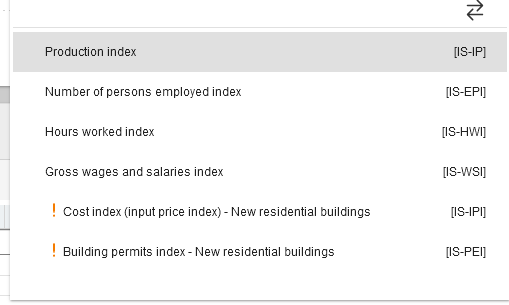

5.1

In [282]:
import pycountry

# Define a function to get the country name from an ISO-3166-1 alpha-2 code
def get_country_name(iso_2):
    try:
        return pycountry.countries.get(alpha_2=iso_2).name
    except:
        return None

# Add a new column to the dataframe with the country names
df['country_name'] = df['geo'].apply(get_country_name)
df_IS_EPI['country_name'] = df_IS_EPI['geo'].apply(get_country_name)
df_IS_HWI['country_name'] = df_IS_HWI['geo'].apply(get_country_name)
df_IS_IP['country_name'] = df_IS_IP['geo'].apply(get_country_name)
df_IS_WSI['country_name'] = df_IS_WSI['geo'].apply(get_country_name)


df.head(5)


geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         AT   396.2   397.8  391.9   353.6      Austria
2010         BE   399.1   361.6  406.5   360.3      Belgium
2010         BG   497.4   454.6  403.8   369.0     Bulgaria
2010         CY   700.9   780.6  853.8   764.7       Cyprus
2010         CZ   433.0   438.5  432.1   455.2      Czechia

In [283]:
#show rows with missing country names
df[df['country_name'].isnull()]

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         EL   581.1   553.6  937.8   721.6         None
2011         EL   481.2   456.7  552.2   588.2         None
2012         EL   451.0   419.4  366.9   475.2         None
2013         EL   452.2   409.4  337.1   421.1         None
2014         EL   530.3   413.4  390.1   458.0         None
2015         EL   400.0   400.0  400.1   400.1         None
2016         EL   474.5   477.4  425.9   458.5         None
2017         EL   497.4   574.0  346.5   505.1         None
2018         EL   524.8   619.8  298.7   502.0         None
2019         EL   421.7   558.8  280.5   422.7         None
2020         EL   380.5   548.5  253.9   438.6         None
2021         EL   318.8   498.1  271.9   405.9         None
2022         EL   308.2   478.0  338.4   429.7         None

In [284]:
#'check if 'Greece' is in country_name column'
'Greece' in df['country_name'].unique()

False

In [285]:
#where 'geo' = 'EL' set 'country_name' = 'Greece'
df.loc[df['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_EPI.loc[df_IS_EPI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_HWI.loc[df_IS_HWI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_IP.loc[df_IS_IP['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_WSI.loc[df_IS_WSI['geo'] == 'EL', 'country_name'] = 'Greece'


6.0

In [286]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht2(df, var, title):
    colors = {"Ireland": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['country_name'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="country_name", x=var, color='country_name', orientation='h', text='country_name', range_x=[0, df[var].max()+10], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="country_name")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


6.1

In [287]:
vars = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
for i in range(len(vars)):
    cht2(dfs[i], vars[i], vars[i])


7.0 Statistics


7.1

In [288]:
# create a new dataframe with the last value for each country in each indicator
df_describe = df.describe()
#df_describe.to_excel('df_describe.xlsx')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 2010 to 2022
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo           403 non-null    object 
 1   IS-EPI        403 non-null    float64
 2   IS-HWI        403 non-null    float64
 3   IS-IP         403 non-null    float64
 4   IS-WSI        403 non-null    float64
 5   country_name  403 non-null    object 
dtypes: float64(4), object(2)
memory usage: 22.0+ KB


7.2

<AxesSubplot:xlabel='IS-WSI', ylabel='Count'>

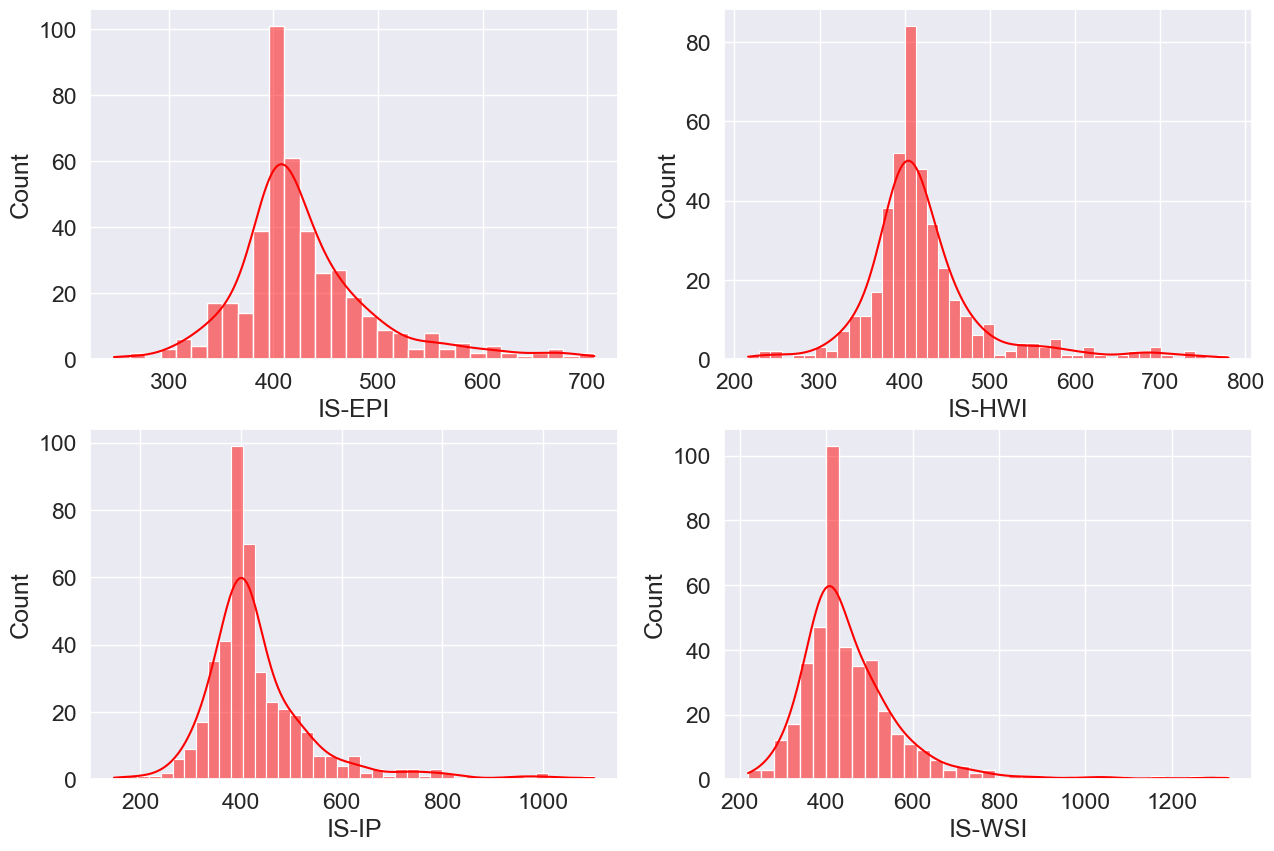

In [290]:
#visulize the distribution of each indicator
import seaborn as sns
import matplotlib.pyplot as plt
#increase the size of the font
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", kde=True, color="red")
sns.histplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", kde=True, color="red")
sns.histplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", kde=True, color="red")
sns.histplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", kde=True, color="red")


<AxesSubplot:xlabel='IS-WSI'>

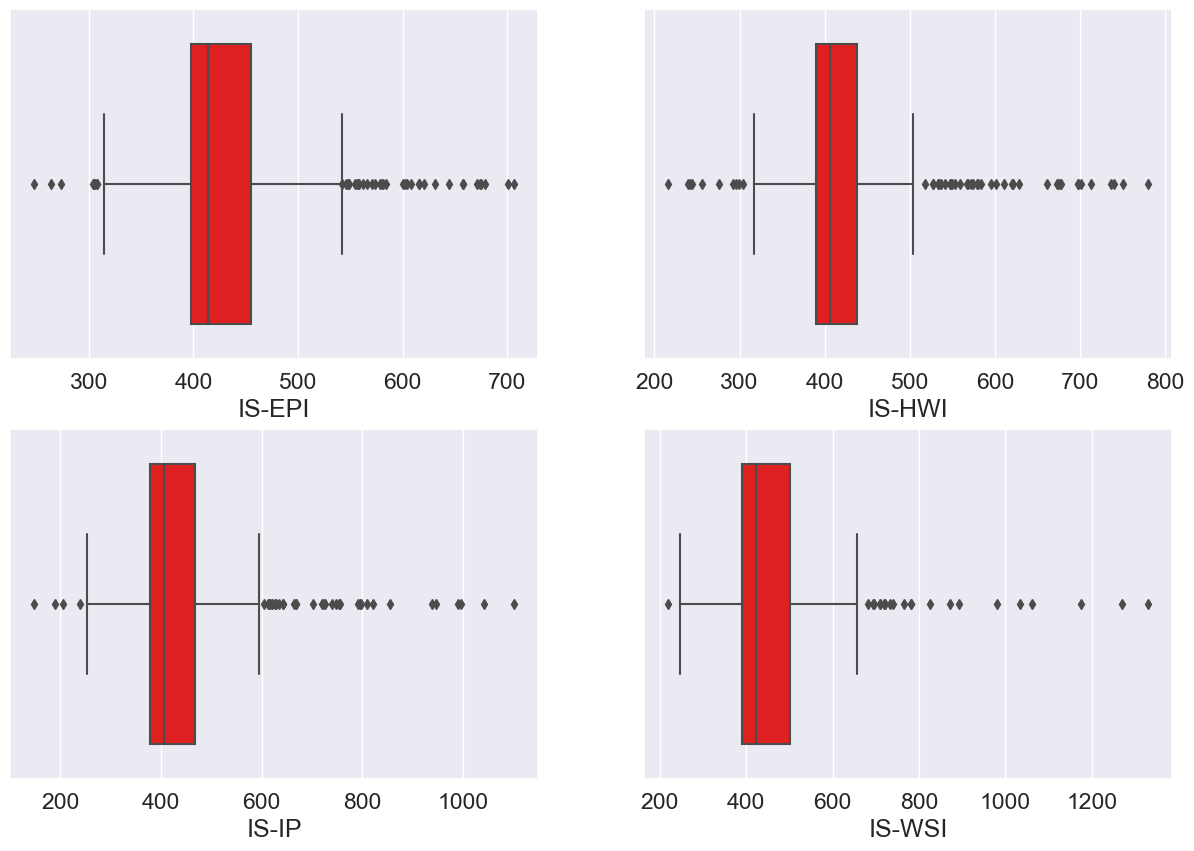

In [291]:
#visulize any outliers in each indicator
import seaborn as sns
import matplotlib.pyplot as plt
#increase the size of the font
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", color="red")
sns.boxplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", color="red")
sns.boxplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", color="red")
sns.boxplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", color="red")


In [292]:
# Create a function for checking normality of a feature
#reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/
#function to return plots for the feature
import scipy.stats as stats
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature]).set_title('Distribution of '+feature)
    plt.subplot(1,2,2)
    #reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [293]:
#calculate the z score for each indicator
from scipy import stats
# Calculate z-scores for each data point
def outliers(data):
    z_scores = np.abs(stats.zscore(data))

    # Define a threshold for identifying outliers
    threshold = 3  # Adjust this threshold as needed

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]

    # Count the number of outliers
    num_outliers = len(outliers)


    return num_outliers
    

print("Number of outliers:",outliers(df['IS-EPI']),'IS-EPI',' Number of values: ',df['IS-EPI'].count())
print("Number of outliers:",outliers(df['IS-HWI']),'IS-HWI',' Number of values: ',df['IS-HWI'].count())
print("Number of outliers:",outliers(df['IS-IP']),'IS-IP',' Number of values: ',df['IS-IP'].count())
print("Number of outliers:",outliers(df['IS-WSI']),'IS-WSI',' Number of values: ',df['IS-WSI'].count())

#percentage of outliers in each indicator
print('IS-EPI',outliers(df['IS-EPI'])/df['IS-EPI'].count()*100,'%')
print('IS-HWI',outliers(df['IS-HWI'])/df['IS-HWI'].count()*100,'%')
print('IS-IP',outliers(df['IS-IP'])/df['IS-IP'].count()*100,'%')
print('IS-WSI',outliers(df['IS-WSI'])/df['IS-WSI'].count()*100,'%')

Number of outliers: 9 IS-EPI  Number of values:  403
Number of outliers: 13 IS-HWI  Number of values:  403
Number of outliers: 9 IS-IP  Number of values:  403
Number of outliers: 8 IS-WSI  Number of values:  403
IS-EPI 2.2332506203473943 %
IS-HWI 3.225806451612903 %
IS-IP 2.2332506203473943 %
IS-WSI 1.9851116625310175 %


7.3


In [294]:
#anderson-darling test for normality
#Checking if the indicators accross the countries are normally distributed
from scipy.stats import anderson
normallyDistributedIndicators = []
NOTnormallyDistributedIndicators = []
def aDarling(df, var):
    result = anderson(df[var])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            #append the indicator to the list of normally distributed indicators if not already there
            if var not in normallyDistributedIndicators:
                normallyDistributedIndicators.append(var)
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            if var not in NOTnormallyDistributedIndicators:
                NOTnormallyDistributedIndicators.append(var)

        
for i in range(len(vars)):
    aDarling(dfs[i], vars[i])

print('Mormally distributed: ', normallyDistributedIndicators)
print('Not Normally Distributed: ', NOTnormallyDistributedIndicators)

Statistic: 14.911
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 24.411
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 24.769
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 18.721
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look nor

In [295]:
#perform a shapiro-wilk test for normality on each indicator
from scipy.stats import shapiro
def sWilk(df, var):
    stat, p = shapiro(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(vars)):
    sWilk(dfs[i], vars[i])
  

Statistics=0.896, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=0.821, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=0.800, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=0.785, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


In [296]:
#perform a chi-square test for normality on each indicator
from scipy.stats import normaltest
def chiSquare(df, var):
    stat, p = normaltest(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(vars)):
    chiSquare(dfs[i], vars[i])
    
    

Statistics=116.014, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=169.565, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=231.697, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=273.755, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


7.3.1

In [297]:
#checking which county's Production Index indicator are normally distributed
from scipy import stats
# Perform Shapiro-Wilk test
normallyDistributed_IP = []
def wilk(df):
    for country in df['geo'].unique():
        
        statistic, p_value = stats.shapiro(df[df['geo']==country]['IS-IP'])

        # Print the test result
        alpha = 0.05  # Set the significance level
        if p_value > alpha:
            #print("Data is normally distributed (fail to reject H0)")
            if country not in normallyDistributed_IP:
                normallyDistributed_IP.append(country)
        else:
        # print("Data is not normally distributed (reject H0)")
            pass

wilk(df_IS_IP)
print(normallyDistributed_IP)
#create a new dataframe with the last value for each country in each indicator
df_normallyDistributed_IP = df_IS_IP[df_IS_IP['geo'].isin(normallyDistributed_IP)]

#drop columns IS-HWI, IS-WSI and IS-EPI
df_normallyDistributed_IP = df_normallyDistributed_IP.drop(['IS-HWI', 'IS-WSI', 'IS-EPI'], axis=1)
df_normallyDistributed_IP.head()
df_normallyDistributed_IP['country_name'].unique().tolist()





['AL', 'BA', 'BE', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'HR', 'IE', 'LT', 'LU', 'LV', 'MK', 'MT', 'NL', 'NO', 'PL', 'SI', 'SK']


['Albania',
 'Bosnia and Herzegovina',
 'Belgium',
 'Switzerland',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Estonia',
 'Spain',
 'Finland',
 'France',
 'Croatia',
 'Ireland',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'North Macedonia',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Slovenia',
 'Slovakia']

7.4

In [298]:
#anderson-darling test for normality
#Checking if the Production index indicator fror all countries are normally distributed 
from scipy.stats import anderson
normallyDistributedIndicators = []
NOTnormallyDistributedIndicators = []
def aDarling(df, var):
    result = anderson(df[var])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            #append the indicator to the list of normally distributed indicators if not already there
            if var not in normallyDistributedIndicators:
                normallyDistributedIndicators.append(var)
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            if var not in NOTnormallyDistributedIndicators:
                NOTnormallyDistributedIndicators.append(var)

        
aDarling(df_normallyDistributed_IP, 'IS-IP')

print('Mormally distributed: ', normallyDistributedIndicators)
print('Not Normally Distributed: ', NOTnormallyDistributedIndicators)

Statistic: 11.569
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Mormally distributed:  []
Not Normally Distributed:  ['IS-IP']


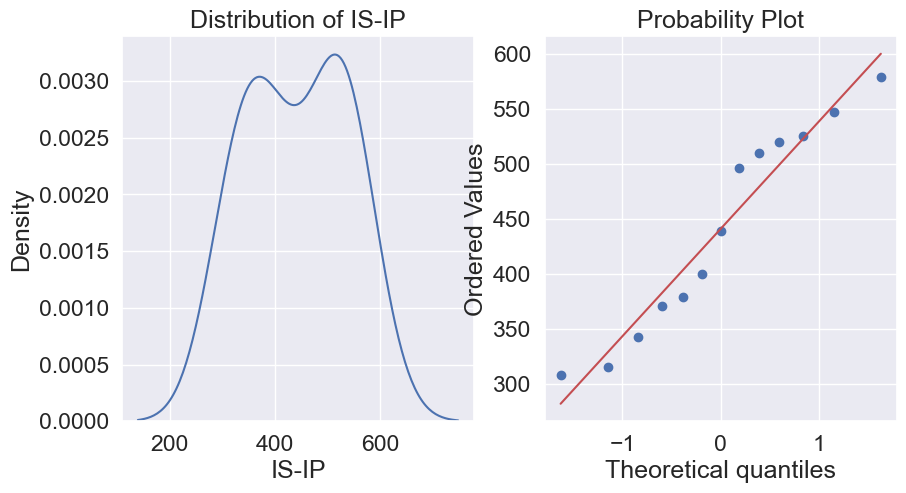

In [299]:
normality(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='IE'],'IS-IP')

In [300]:
aDarling(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='IE'], 'IS-IP')

Statistic: 0.415
15.000: 0.497, data looks normal (fail to reject H0)
10.000: 0.566, data looks normal (fail to reject H0)
5.000: 0.679, data looks normal (fail to reject H0)
2.500: 0.792, data looks normal (fail to reject H0)
1.000: 0.942, data looks normal (fail to reject H0)


7.5

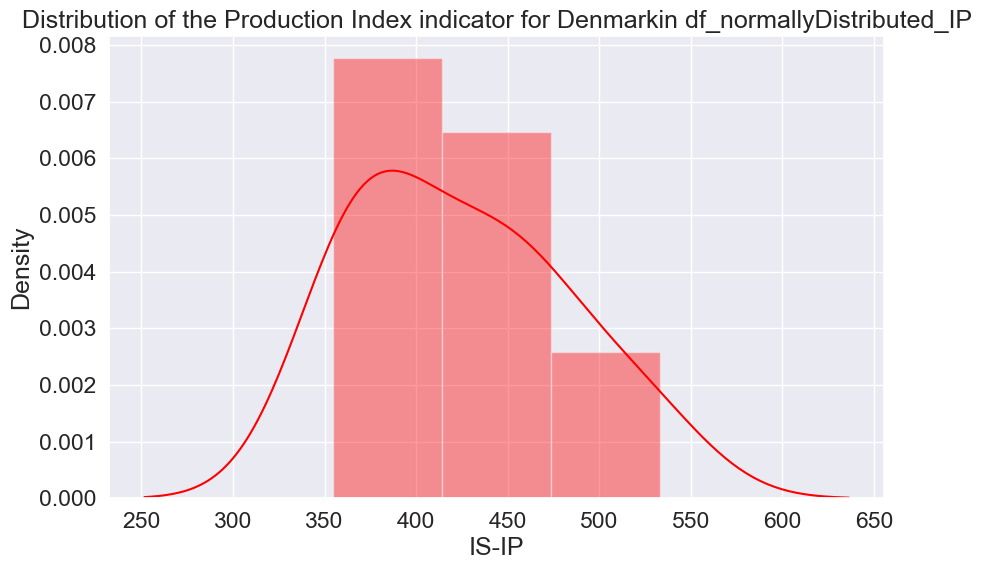

In [301]:
#plot the distribution of the Production Index indicator for all countries in df_normallyDistributed_IP
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP'], color='red')
plt.title('Distribution of the Production Index indicator for Denmarkin df_normallyDistributed_IP')
plt.show()

In [302]:
#calculate the confidence interval for each indicator
from scipy import stats
import numpy as np
# Calculate the confidence interval for each data point
def confidence_interval(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    return start, end



print('IS-IP',confidence_interval(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))





IS-IP (389.580453032915, 459.03493158246965)


In [303]:
#confirm calculation based on class lecture demo
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP'])-1, loc=np.mean(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']), scale=st.sem(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))

(389.580453032915, 459.03493158246965)

<AxesSubplot:title={'center':'Ireland'}, xlabel='TIME_PERIOD', ylabel='IS-IP'>

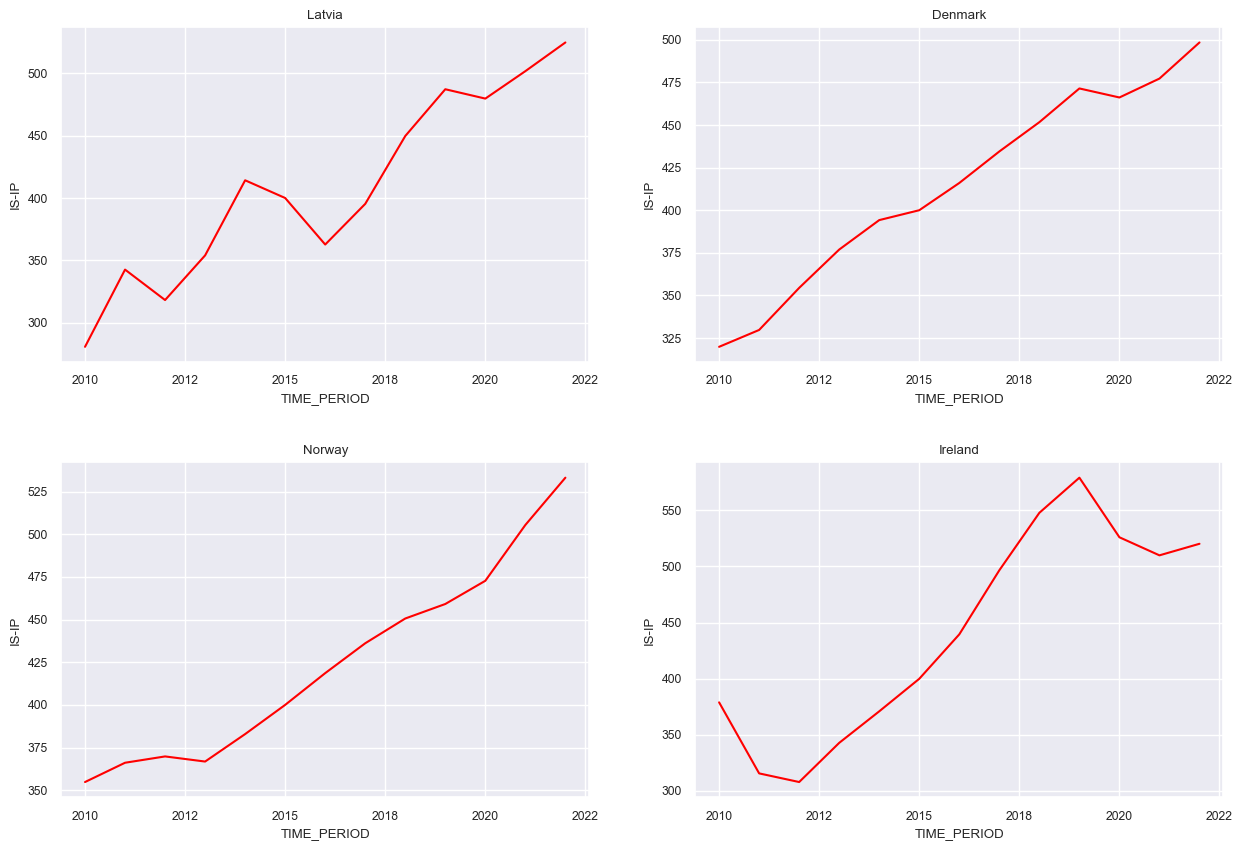

In [304]:
#visu;ize the confidence interval for each indicator

#visulize the confidence interval for each indicator
import seaborn as sns
import matplotlib.pyplot as plt

#decresae the size of the font
sns.set(font_scale=.8)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#turn sns.lineplot x axis ticks 90 degrees

#set title for each plot
axes[0, 0].set_title('Latvia')
axes[0, 1].set_title('Denmark')
axes[1, 0].set_title('Norway')
axes[1, 1].set_title('Ireland')

#increase space between row 0 and row 1
fig.subplots_adjust(hspace=.3)
#display every 4th tick
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[0, 1].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(6))

sns.lineplot(ax=axes[0, 0], data=df_normallyDistributed_IP, x="TIME_PERIOD", y=df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='LT']['IS-IP'], color="red")
sns.lineplot(ax=axes[1, 0], data=df_normallyDistributed_IP, x="TIME_PERIOD", y=df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP'], color="red")
sns.lineplot(ax=axes[0, 1], data=df_normallyDistributed_IP, x="TIME_PERIOD", y=df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='NO']['IS-IP'], color="red")
sns.lineplot(ax=axes[1, 1], data=df_IS_IP, x="TIME_PERIOD", y=df_IS_IP[df_IS_IP['geo']=='IE']['IS-IP'], color="red")






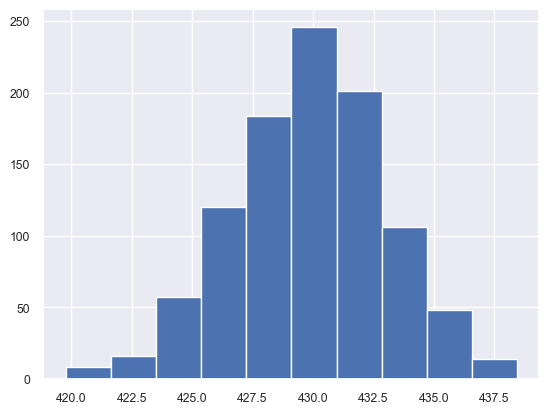

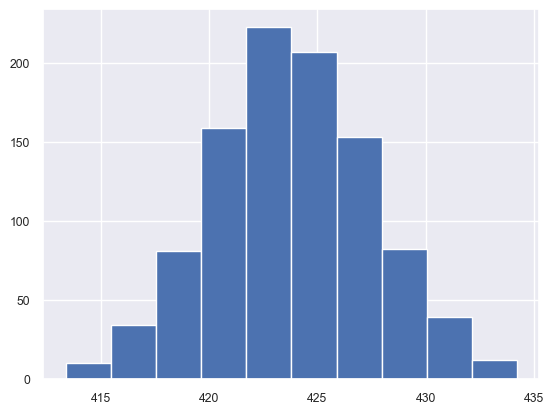

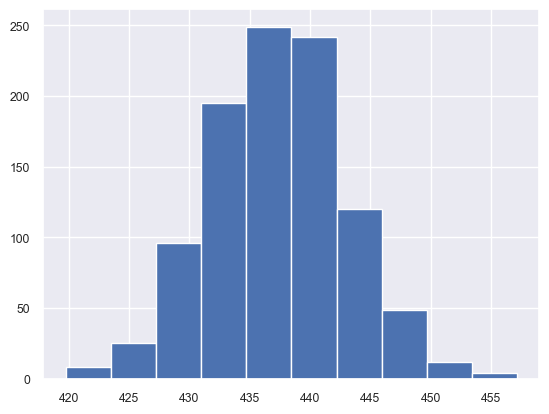

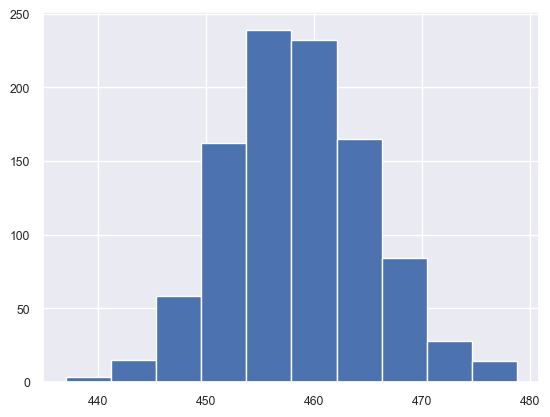

In [308]:
#bootstrap resampling to calculate the confidence interval for each indicator
#https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
from sklearn.utils import resample
# configure bootstrap
def bootS(df, var): 
    n_iterations = 1000
    n_size = int(len(df[var]))
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        # prepare train and test sets
        s = resample(df[var], n_samples=n_size)
        # calculate statistic
        stat = np.mean(s)
        # store
        stats.append(stat)
    # plot scores
    plt.hist(stats)
    plt.show()
    
for i in range(len(vars)):
    bootS(dfs[i], vars[i])

In [353]:
#Calculate the proportion of Construction Index values for each country relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
df_IS_IP['Proportion'] = df_IS_IP.groupby('TIME_PERIOD')['IS-IP'].apply(lambda x:  x / float(x.sum()))

In [354]:
#display sum of Proportion by year for all countries
df_IS_IP.groupby('TIME_PERIOD')['Proportion'].sum()

TIME_PERIOD
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Proportion, dtype: float64

In [355]:
df_IS_IP['Proportion']

68      0.028711
69      0.026874
70      0.029493
71      0.027875
72      0.027690
          ...   
1724    0.033116
1725    0.041825
1726    0.028545
1727    0.036483
1728    0.019249
Name: Proportion, Length: 442, dtype: float64

In [374]:
#use Wilson Score to calculate the confidence interval for 'IE' country proportion of Construction Index values relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
import numpy as np
from scipy.stats import norm

def wilson_score(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)

    if n == 0 or n == 1 or m == 0 or m == 1:
        # Handle zero variance case
        start, end = 0.0, 1.0
    else:
        z = norm.ppf(1 - (1 - confidence) / 2)
        h = z * np.sqrt((m * (1 - m)) / n)
        start = m - h
        end = m + h

    return start, end



# Step 3: Calculate the confidence interval using the Wilson score method for each year
confidence_intervals = df_IS_IP.groupby('TIME_PERIOD')['Proportion'].apply(wilson_score)
test = df_IS_IP.groupby('TIME_PERIOD')['Proportion']
print(test)
# Print the confidence intervals for each year
for year, interval in confidence_intervals.items():
    print(f"Year {year}: Confidence Interval = {interval}")



Year 2010: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2011: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2012: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2013: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2014: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2015: Confidence Interval = (-0.027380172816874316, 0.086203702228639)
Year 2016: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2017: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2018: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2019: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2020: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2021: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2022: Confidence Interval = (-0.02738017281687432, 0.08620370222863

In [375]:
#show values for Oroportion for Ireland
df_IS_IP[df_IS_IP['geo']=='IE']['Proportion']

85      0.025982
221     0.022424
357     0.023389
493     0.026806
629     0.028344
765     0.029402
901     0.032020
1037    0.033744
1172    0.034602
1307    0.034445
1442    0.032148
1577    0.029924
1712    0.029944
Name: Proportion, dtype: float64

In [376]:
#check percentage of time Ireland's Construction Index Proportion is within the confidence interval CI_IE
df_IS_IP[df_IS_IP['geo']=='IE']['Proportion'].between(confidence_intervals[0][0], confidence_intervals[0][1]).mean()


1.0

In [386]:
import numpy as np
from scipy.stats import norm

# Assuming you have a DataFrame named 'df' containing the necessary data
# and the columns 'geo', 'Production Index', and 'Year'



# Calculate the sample size and observed proportion for each year
sample_sizes = df_IS_IP.groupby('TIME_PERIOD')['IS-IP'].sum()
observed_proportions = df_IS_IP.groupby('TIME_PERIOD').apply(lambda x: x[x['geo'] == 'IE']['IS-IP'].sum() / x['IS-IP'].sum())

# Calculate the standard error and margin of error using the normal approximation
standard_errors = np.sqrt((observed_proportions * (1 - observed_proportions)) / sample_sizes)
z = norm.ppf(0.975)  # 95% confidence level (two-tailed)
margin_of_errors = z * standard_errors

# Calculate the confidence intervals
lower_bounds = observed_proportions - margin_of_errors
upper_bounds = observed_proportions + margin_of_errors

# Print the confidence intervals for each year
for year in df_IS_IP['TIME_PERIOD'].unique():
    proportion = df_IS_IP[(df_IS_IP['TIME_PERIOD'] == year) & (df_IS_IP['geo'] == 'IE')]['Proportion'].iloc[0]
    res = False
    if proportion >= lower_bounds[year] and proportion <= upper_bounds[year]:
        res = True
    #format values to 4 decimal places
    lower_bounds[year] = "{:.2f}".format(lower_bounds[year]*100)
    upper_bounds[year] = "{:.2f}".format(upper_bounds[year]*100)
    proportion = "{:.2f}".format(proportion*100)
    
    print(f"Year {year}: Confidence Interval = ({lower_bounds[year]}, {upper_bounds[year]}). Is {proportion} within the interval? {res}")




Year 2010: Confidence Interval = (2.34, 2.86). Is 2.60 within the interval? True
Year 2011: Confidence Interval = (2.00, 2.49). Is 2.24 within the interval? True
Year 2012: Confidence Interval = (2.08, 2.60). Is 2.34 within the interval? True
Year 2013: Confidence Interval = (2.40, 2.96). Is 2.68 within the interval? True
Year 2014: Confidence Interval = (2.55, 3.12). Is 2.83 within the interval? True
Year 2015: Confidence Interval = (2.66, 3.22). Is 2.94 within the interval? True
Year 2016: Confidence Interval = (2.91, 3.50). Is 3.20 within the interval? True
Year 2017: Confidence Interval = (3.08, 3.67). Is 3.37 within the interval? True
Year 2018: Confidence Interval = (3.18, 3.74). Is 3.46 within the interval? True
Year 2019: Confidence Interval = (3.17, 3.72). Is 3.44 within the interval? True
Year 2020: Confidence Interval = (2.94, 3.49). Is 3.21 within the interval? True
Year 2021: Confidence Interval = (2.74, 3.25). Is 2.99 within the interval? True
Year 2022: Confidence Interv